In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation (so 0.000 is printed as 0.)


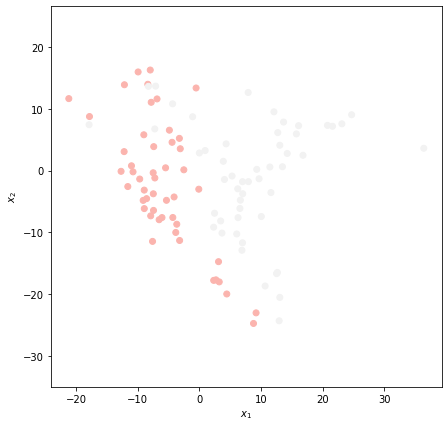

In [2]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100,
                             n_features=2,
                             n_informative=2,
                             n_redundant=0,
                             n_repeated=0,
                             n_classes=2,
                             n_clusters_per_class=2,
                             weights=None,
                             flip_y=0.01,
                             class_sep=0.8,
                             hypercube=True, shift=10.0, scale=8.0, shuffle=True, random_state=7)

X_centered = X - np.mean(X)

def plot_dataset():
    plt.figure(figsize=(7,7))
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.axis('equal')
    plt.scatter(X_centered[:,0], X_centered[:,1], c=y, cmap='Pastel1')
plot_dataset()

In [5]:
# gotta be centered
def cov_mat(X):
    return 1/X.shape[1] * np.matmul(X.T,X)

cmat=cov_mat(X_centered)
cmat

array([[ 5489.05598, -1014.83571],
       [-1014.83571,  4800.44164]])

14 converged


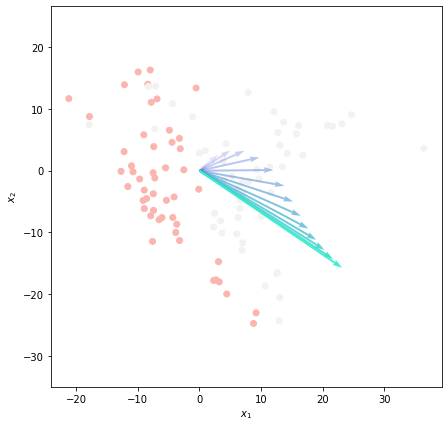

In [6]:
v = np.array( [[1],[1]] )
v = v/np.linalg.norm(v)
plot_dataset()
origin = [0], [0]

it = 15
for i in range(1,it):        
    plt.quiver(*origin, v[0,0], v[1,0], width=0.005, scale_units='x', scale=1/(i*2), color=(0.2,i/it,0.8,i/it))
    v_prev = v
    v = np.matmul( cmat, v )
    v = v / np.linalg.norm(v)
    if( np.abs( np.arccos(v[0,0]) - np.arccos(v_prev[0,0]) ) < 0.01 ):
        print(i,"converged")
        break    

plt.show()

In [7]:
v.shape

(2, 1)

In [8]:
cmat.shape

(2, 2)

In [13]:
X_reduced = np.matmul(X_centered,v)

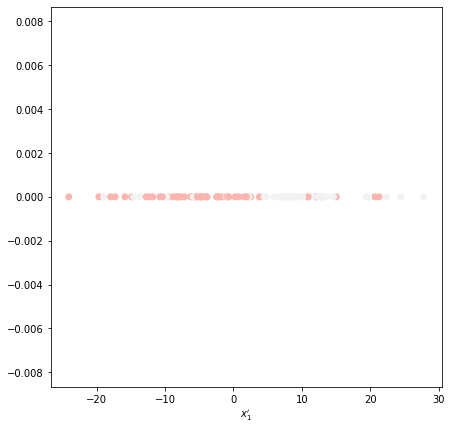

In [10]:
plt.figure(figsize=(7,7))
plt.xlabel("$x_1'$")
plt.scatter(X_reduced[:,0], np.zeros(shape=(X_reduced.shape[0],1)), c=y, cmap='Pastel1')
